In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('../data_processing/')
sys.path.append('../folds/')
from feature import Feature
from folds import CustomFold

In [8]:
labeled_df = pd.read_hdf('../../data/e3_labeled.h5', key='table')
labeled_df.head()

,"r_std(self, window_size=50, window_stride=None)-w_quantile(self, q=0.05, window_size=150000, window_stride=1000)","r_std(self, window_size=200, window_stride=None)-w_quantile(self, q=0.05, window_size=150000, window_stride=1000)","r_std(self, window_size=1000, window_stride=None)-w_quantile(self, q=0.05, window_size=150000, window_stride=1000)","r_std(self, window_size=1000, window_stride=None)-w_median(self, window_size=150000, window_stride=1000)","r_sta_lta(self, sta_window=1000, lta_window=10000, window_size=150000, window_stride=1000)-w_median(self, window_size=150000, window_stride=1000)",ttf
0,2.307899,2.558338,2.705401,3.379858,0.859559,1
1,2.306595,2.557298,2.705357,3.374214,0.859559,1
2,2.303128,2.553429,2.702485,3.359603,0.859559,1
3,2.300926,2.552076,2.701234,3.345452,0.859817,1
4,2.299652,2.550838,2.700947,3.334065,0.862167,1


In [10]:
min(labeled_df.ttf)

0

In [7]:
processed_df = pd.read_hdf('../../data/e3.h5', key='table')
processed_df.ttf = np.digitize(processed_df['ttf'].values, np.arange(0, 16, 1)) - 1
processed_df.to_hdf('../../data/e3_labeled.h5', key='table')

(array([    0., 61595., 59405., 57742., 57734., 57752., 57750., 57736.,
        53769., 43543., 32088., 30793., 21607., 14226., 18993.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Patch objects>)

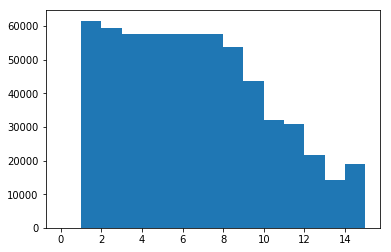

In [7]:
plt.hist(processed_df.ttf, np.arange(0, 16, 1))

In [12]:
df = pd.read_hdf('../../data/train.h5', key='table')

In [14]:
df_dec_s = Feature(df['s'], '../../data/').w_last_elem(window_size=150000, window_stride=1000).data
df_dec_ttf = Feature(df['ttf'], '../../data/').w_last_elem(window_size=150000, window_stride=1000).data

w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 628997/628997 [00:34<00:00, 18218.47it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 1000
w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 628997/628997 [00:31<00:00, 19889.20it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 1000


In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_dec_s[df_dec_s.columns[0]])
plt.grid(True)
plt.figure(figsize=(20, 5))
plt.plot(df_dec_ttf[df_dec_ttf.columns[0]])
plt.grid(True)
plt.show()

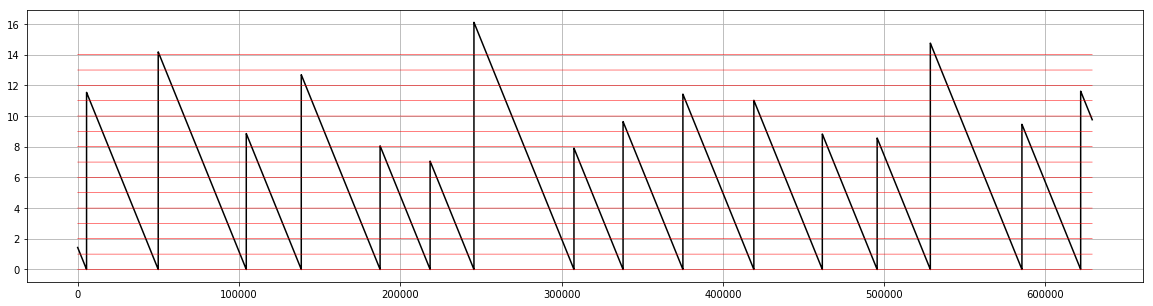

In [15]:
signal = df_dec_ttf[df_dec_ttf.columns[0]]
plt.figure(figsize=(20, 5))
plt.plot(signal, 'k')
for i in range(0, 15):
    plt.plot(i*np.ones(signal.shape), 'r', linewidth=0.5)
plt.grid(True)
plt.show()

In [ ]:
labels = np.digitize(df_dec_ttf.values, bins=np.arange(0, 16, 1))

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(labels, bins = np.arange(0, 16, 1))
plt.show()

In [ ]:
df_valid_dec_s = Feature(df_valid['s'], '../../data/').w_last_elem(window_size=150000, window_stride=1000).data
df_valid_dec_ttf = Feature(df_valid['ttf'], '../../data/').w_last_elem(window_size=150000, window_stride=1000).data
df_train_dec_s = Feature(df_train['s'], '../../data/').w_last_elem(window_size=150000, window_stride=1000).data
df_train_dec_ttf = Feature(df_train['ttf'], '../../data/').w_last_elem(window_size=150000, window_stride=1000).data

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_train_dec_s[df_train_dec_s.columns[0]])
plt.grid(True)
plt.figure(figsize=(20, 5))
plt.plot(df_train_dec_ttf[df_train_dec_ttf.columns[0]])
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(df_valid_dec_s[df_valid_dec_s.columns[0]])
plt.grid(True)
plt.figure(figsize=(20, 5))
plt.plot(df_valid_dec_ttf[df_valid_dec_ttf.columns[0]])
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_hdf('../../data/train.h5', key='table')

In [10]:
# savgol_acorr150_1 = Feature(df['s'][:int(1e8)], '../../data/e3/')\
# .w_autocorrelation(window_size=150000, window_stride=100, lag=10)\
# .dump()\
# .r_savgol_filter(window_length=1499, polyorder=1)\
# .dump()\
# .data

med_sta_lta = Feature(df['s'][:int(1e8)], '../../data/e3/')\
.r_sta_lta(sta_window=1000, lta_window=10000)\
.w_median(window_size=150000, window_stride=1000)\
.dump()\
.data

ttf = Feature(df['ttf'][:int(1e8)], '../../data/e3/')\
.w_last_elem(window_size=150000, window_stride=1000)\
.dump()\
.data

                                                                                                                                           

                                                                                                                         


                                                                                                       
                                                                                                                    	 Rolling decorator for r_sta_lta: 
w_autocorrelation(self, window_size=150000, window_stride=100, lag=10, (lag=100)):   2%|▏         | 23275/998501 [07:42<14:24, 1128.62it/s]

w_psd_sum(self, window_size=150000, window_stride=100, (fs=4000000.0)):   1%|          | 10828/998501 [04:05<30:39, 536.97it/s]


w_median(self, window_size=150000, window_stride=100):  15%|█▍        | 146662/998501 [01:22<06:55, 2048.98it/s]
w_std(self, window_size=150000, window_stride=100, (axis=0)):  19%|█▉        | 188839/998501 [0

w_median(self, window_size=150000, window_stride=1000):  24%|██▎       | 23652/99851 [00:12<00:42, 1789.94it/s]



w_median(self, window_size=150000, window_stride=1000):  24%|██▍       | 23864/99851 [00:12<00:40, 1875.49it/s]



w_median(self, window_size=150000, window_stride=1000):  24%|██▍       | 24070/99851 [00:12<00:39, 1925.56it/s]



w_median(self, window_size=150000, window_stride=1000):  24%|██▍       | 24282/99851 [00:12<00:38, 1980.02it/s]



w_median(self, window_size=150000, window_stride=1000):  25%|██▍       | 24485/99851 [00:12<00:37, 1988.77it/s]



w_median(self, window_size=150000, window_stride=1000):  25%|██▍       | 24691/99851 [00:12<00:37, 2008.01it/s]



w_median(self, window_size=150000, window_stride=1000):  25%|██▍       | 24906/99851 [00:12<00:36, 2045.96it/s]



w_median(self, window_size=150000, window_stride=1000):  25%|██▌       | 25113/99851 [00:12<00:37, 2004.96it/s]



w_median(self, window_size=150000, window_stride=1000):  25%|██▌       | 25315/9

w_median(self, window_size=150000, window_stride=1000):  50%|████▉     | 49598/99851 [00:25<00:29, 1719.09it/s]



w_median(self, window_size=150000, window_stride=1000):  50%|████▉     | 49771/99851 [00:25<00:30, 1628.97it/s]



w_median(self, window_size=150000, window_stride=1000):  50%|█████     | 49939/99851 [00:25<00:30, 1642.59it/s]



w_median(self, window_size=150000, window_stride=1000):  50%|█████     | 50130/99851 [00:25<00:29, 1712.78it/s]



w_median(self, window_size=150000, window_stride=1000):  50%|█████     | 50312/99851 [00:25<00:28, 1742.72it/s]



w_median(self, window_size=150000, window_stride=1000):  51%|█████     | 50494/99851 [00:25<00:27, 1762.90it/s]



w_median(self, window_size=150000, window_stride=1000):  51%|█████     | 50681/99851 [00:25<00:27, 1792.41it/s]



w_median(self, window_size=150000, window_stride=1000):  51%|█████     | 50871/99851 [00:26<00:26, 1821.95it/s]



w_median(self, window_size=150000, window_stride=1000):  51%|█████     | 51056/9

w_median(self, window_size=150000, window_stride=1000):  75%|███████▍  | 74511/99851 [00:38<00:12, 1984.00it/s]



w_median(self, window_size=150000, window_stride=1000):  75%|███████▍  | 74724/99851 [00:38<00:12, 2023.99it/s]



w_median(self, window_size=150000, window_stride=1000):  75%|███████▌  | 74933/99851 [00:38<00:12, 2043.12it/s]



w_median(self, window_size=150000, window_stride=1000):  75%|███████▌  | 75148/99851 [00:38<00:11, 2073.11it/s]



w_median(self, window_size=150000, window_stride=1000):  75%|███████▌  | 75360/99851 [00:38<00:11, 2086.66it/s]



w_median(self, window_size=150000, window_stride=1000):  76%|███████▌  | 75569/99851 [00:38<00:11, 2072.39it/s]



w_median(self, window_size=150000, window_stride=1000):  76%|███████▌  | 75777/99851 [00:38<00:11, 2068.32it/s]



w_median(self, window_size=150000, window_stride=1000):  76%|███████▌  | 75984/99851 [00:39<00:11, 2068.72it/s]



w_median(self, window_size=150000, window_stride=1000):  76%|███████▋  | 76194/9

w_median(self, window_size=150000, window_stride=100):  15%|█▍        | 146662/998501 [02:13<06:55, 2048.98it/s]
                                                                                                                                           

                                                                                                                         


                                                                                                       
                                                                                                                    	 - window size: 150000
w_autocorrelation(self, window_size=150000, window_stride=100, lag=10, (lag=100)):   2%|▏         | 23275/998501 [08:33<14:24, 1128.62it/s]

w_psd_sum(self, window_size=150000, window_stride=100, (fs=4000000.0)):   1%|          | 10828/998501 [04:56<30:39, 536.97it/s]


w_median(self, window_size=150000, window_stride=100):  15%|█▍        | 146662/998501 [02:13<06:55, 2048.98

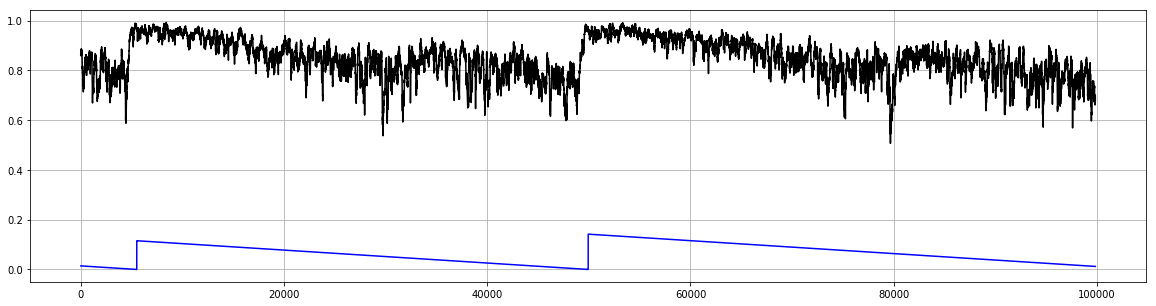

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(med_sta_lta[:1000*150].values, 'k')
plt.plot(0.01*ttf[:1000*150].values, 'b')
# plt.ylim([2, 10])
plt.grid(True)

In [ ]:
df_valid = pd.read_hdf('../../data/e2/valid_data.h5', key='table')

In [ ]:
def test_generator(dataframe, size=150000):
    while True:
        i = random.randint(0, dataframe.shape[0] - size)
        test_sample = df_valid.iloc[i:i+size]
        yield test_sample

In [ ]:
test_gen = test_generator(df_valid)

In [ ]:
test_sample = next(test_gen)

In [ ]:
test_sample_val = Feature(test_sample['s'], '../../data/')\
.r_std(window_size=1000)\
.w_median(window_size=150000, window_stride=1000).data

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(med_std1000.values, 'lightblue')
plt.plot(med_std1000_filtered.values, 'k')
plt.plot(ttf.values, 'b')
plt.plot((test_sample_val.values + 0.6) * np.ones(med_std1000_filtered.values.shape), 'r')
plt.plot((test_sample_val.values - 0.8) * np.ones(med_std1000_filtered.values.shape), 'r')
# plt.ylim([2, 6])
plt.grid(True)

In [ ]:
results = []
eps_list = np.linspace(-0.8, 0.6, 100)
for eps in eps_list:    
    test_sample_val_arr = ((test_sample_val.values + eps) * np.ones(med_std1000_filtered.values.shape)).reshape(-1,)
    med_std1000_filtered_arr = med_std1000_filtered.values.reshape(-1,)
    isclose_list = np.isclose(test_sample_val_arr, med_std1000_filtered_arr, atol=1e-3)
    isclose_idx = [i for i, x in enumerate(isclose_list) if x]
    results.append(np.mean(ttf.iloc[isclose_idx].values))

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(results, 'r')
plt.grid(True)
plt.ylabel("ttf_predicted")
plt.xlabel("eps")
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(med_std1000.values, 'lightblue')
plt.plot(med_std1000_filtered.values, 'k')
plt.plot(ttf.values, 'b')
plt.plot((test_sample_val.values + 0.6) * np.ones(med_std1000_filtered.values.shape), 'r')
plt.plot((test_sample_val.values - 0.8) * np.ones(med_std1000_filtered.values.shape), 'r')
plt.plot(max(results) * np.ones(med_std1000_filtered.values.shape), 'g')
plt.plot(min(results) * np.ones(med_std1000_filtered.values.shape), 'g')
# plt.ylim([2, 6])
plt.grid(True)